In [ ]:
# pip install opencv-python-headless numpy


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('dddd.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the grayscale image to a NumPy array
gray_array = np.array(gray_image)

# Display the shape of the NumPy array
print(gray_array.shape)

# Optionally, save the grayscale image
cv2.imwrite('grayscale_image.jpg', gray_image)


(486, 473)


True

In [ ]:
max(gray_array[0])

148

In [ ]:
# import cv2
# import numpy as np

# # Ask the user for the image file path
# image_path = input("Enter the path to the image file: ")

# try:
#     # Load the image
#     image = cv2.imread(image_path)

#     # Convert the image to grayscale
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Convert the grayscale image to a NumPy array
#     gray_array = np.array(gray_image)

#     # Display the shape of the NumPy array
#     print("Shape of the grayscale array:", gray_array.shape)

#     # Optionally, save the grayscale image
#     cv2.imwrite('grayscale_image.jpg', gray_image)

# except Exception as e:
#     print("An error occurred:", e)


In [ ]:
# import random

# def generate_random_pixels(width, height, pixel_range):
#     pixels = [[(random.randint(pixel_range[0], pixel_range[1]))
#                for _ in range(width)]
#               for _ in range(height)]
#     return pixels

# # Define parameters
# width = 800
# height = 600
# pixel_range = (0, 49)  # Example: for grayscale L=50

# Generate 2D array of pixels
array1 = gray_array
array = np.array(array1, dtype=np.int16)



In [ ]:
shape = gray_array.shape
width = shape[1]
height = shape[0]
pixel_range = (0, 255)
m=10 #horizontal j
n=11 #vertical i
d1 = 10 # horizontal
d2 = 10 # vertical

In [ ]:
arr1 = {i: 0 for i in range(2*pixel_range[1]+1)}
arr2 = {i: 0 for i in range(-pixel_range[1], pixel_range[1]+1)}
temp_sum = {i: 0 for i in range(2*pixel_range[1]+1)}
temp_diff = {i: 0 for i in range(-pixel_range[1], pixel_range[1]+1)}

In [ ]:
import numpy as np

In [ ]:
import math

def ASM(S,D):
    Psum=0
    Pdiff=0

    for i in range(0,len(S)):
        Psum += (S[i])**2

    for i in range(0,len(S)):
        Pdiff += (D[i])**2

    return Psum*Pdiff

def IDM(S,D):
    Sum=0
    L= (len(D)+1)/2
    for j in range(0,len(D)):
        Sum += D[j]/(1+(j-L+1)**2)

    return Sum

def CON(S,D):
    Sum=0
    L= (len(D)+1)/2
    for j in range(0,len(D)):
        Sum += ((j-L+1)**2)*D[j]

    return Sum

def ENT(S,D):
    SumS=0
    SumD=0

    for i in range(0,len(S)):
        if(S[i]!=0):
            SumS += S[i]*(math.log10(S[i]))
        if(D[i]!=0):
            SumD += D[i]*(math.log10(D[i]))

    return -SumS-SumD

In [ ]:
asm = np.array([[0 for j in range(width-m)] for i in range(height-n)],dtype=float)
idm = np.array([[0 for j in range(width-m)] for i in range(height-n)],dtype=float)
con = np.array([[0 for j in range(width-m)] for i in range(height-n)],dtype=float)
ent = np.array([[0 for j in range(width-m)] for i in range(height-n)],dtype=float)

In [ ]:
def norm(ar):
  sum = np.sum(ar)
  normalized_data = ar / sum
  return normalized_data


In [ ]:
for k in range(height-n):
  for l in range(width-m):
    if(l==0):
      for i in range(n-d2):
        for j in range(m-d1):
          arr1[array[k+i][l+j]+array[k+i+d2][l+j+d1]] = arr1[array[k+i][l+j]+array[k+i+d2][l+j+d1]] + 1

          arr2[array[k+i][l+j]-array[k+i+d2][l+j+d1]] = arr2[array[k+i][l+j]-array[k+i+d2][l+j+d1]] + 1

          if(j==0):
            temp_sum[array[k+i][l+j]+array[k+i+d2][l+j+d1]] = temp_sum[array[k+i][l+j]+array[k+i+d2][l+j+d1]] + 1
            temp_diff[array[k+i][l+j]-array[k+i+d2][l+j+d1]] = temp_diff[array[k+i][l+j]-array[k+i+d2][l+j+d1]] + 1

      S = norm(np.array(list(arr1.values())))
      D = norm(np.array(list(arr2.values())))
      print(np.array(list(arr1.values())), S, np.array(list(arr2.values())), D)
      asm[k][l]=float(ASM(S,D))
      idm[k][l]=float(IDM(S,D))
      con[k][l]=float(CON(S,D))
      ent[k][l]=float(ENT(S,D))

    else:
      arr1 = {key: arr1[key] - temp_sum[key] for key in arr1 if key in temp_sum}
      arr2 = {key: arr2[key] - temp_diff[key] for key in arr2 if key in temp_diff}
      temp_sum = {key: 0 for key in temp_sum}
      temp_diff = {key: 0 for key in temp_diff}
      for i in range(n-d2):
        temp_sum[array[k+i][l+m-d1-1]+array[k+i+d2][l+m-1]] = temp_sum[array[k+i][l+m-d1-1]+array[k+i+d2][l+m-1]] + 1
        temp_diff[array[k+i][l+m-d1-1]-array[k+i+d2][l+m-1]] = temp_diff[array[k+i][l+m-d1-1]-array[k+i+d2][l+m-1]] + 1
      arr1 = {key: arr1[key] + temp_sum[key] for key in arr1 if key in temp_sum}
      arr2 = {key: arr2[key] + temp_diff[key] for key in arr2 if key in temp_diff}
      S = norm(np.array(list(arr1.values())))
      D = norm(np.array(list(arr2.values())))
      asm[k][l]=float(ASM(S,D))
      idm[k][l]=float(IDM(S,D))
      con[k][l]=float(CON(S,D))
      ent[k][l]=float(ENT(S,D))

Streaming output truncated to the last 5000 lines.
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
asm

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
idm

array([[2.77700639e-04, 3.30469266e-04, 6.24609619e-04, ...,
        2.09995800e-04, 1.73100225e-04, 1.45137881e-04],
       [1.45137881e-04, 4.72366556e-04, 1.10987791e-03, ...,
        1.98333994e-04, 1.77746178e-04, 1.48698885e-04],
       [1.48698885e-04, 8.64304235e-04, 2.76243094e-03, ...,
        2.36630383e-04, 2.09995800e-04, 1.92864031e-04],
       ...,
       [1.00000000e-01, 8.15660685e-04, 1.47710487e-03, ...,
        2.36630383e-04, 9.17431193e-04, 5.00000000e-01],
       [5.00000000e-01, 3.89105058e-03, 2.00000000e-02, ...,
        1.98333994e-04, 6.24609619e-04, 1.53846154e-02],
       [1.53846154e-02, 3.84615385e-02, 5.07614213e-03, ...,
        1.64338537e-04, 4.52488688e-04, 3.44827586e-03]])

In [ ]:
con

array([[3.600e+03, 3.025e+03, 1.600e+03, ..., 4.761e+03, 5.776e+03,
        6.889e+03],
       [6.889e+03, 2.116e+03, 9.000e+02, ..., 5.041e+03, 5.625e+03,
        6.724e+03],
       [6.724e+03, 1.156e+03, 3.610e+02, ..., 4.225e+03, 4.761e+03,
        5.184e+03],
       ...,
       [9.000e+00, 1.225e+03, 6.760e+02, ..., 4.225e+03, 1.089e+03,
        1.000e+00],
       [1.000e+00, 2.560e+02, 4.900e+01, ..., 5.041e+03, 1.600e+03,
        6.400e+01],
       [6.400e+01, 2.500e+01, 1.960e+02, ..., 6.084e+03, 2.209e+03,
        2.890e+02]])

In [ ]:
ent

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data ={}
df = pd.DataFrame(data)


# Create a 2D NumPy array
array_2d = asm

# Flatten the array
flattened_array_asm = array_2d.ravel()

# Create a Pandas Series from the flattened array
asm_s = pd.Series(flattened_array_asm)
df['asm'] = asm_s


# Create a 2D NumPy array
array_2d = idm

# Flatten the array
flattened_array_idm = array_2d.ravel()

# Create a Pandas Series from the flattened array
idm_s = pd.Series(flattened_array_idm)
df['idm'] = idm_s


# Create a 2D NumPy array
array_2d = con

# Flatten the array
flattened_array_con = array_2d.ravel()

# Create a Pandas Series from the flattened array
con_s = pd.Series(flattened_array_con)
df['con'] = con_s

# Create a 2D NumPy array
array_2d = ent

# Flatten the array
flattened_array_ent = array_2d.ravel()

# Create a Pandas Series from the flattened array
ent_s = pd.Series(flattened_array_ent)
df['ent'] = ent_s









In [ ]:
# df= pd.read_csv("/content/drive/MyDrive/GNR 607/wine-clustering.csv")
# df

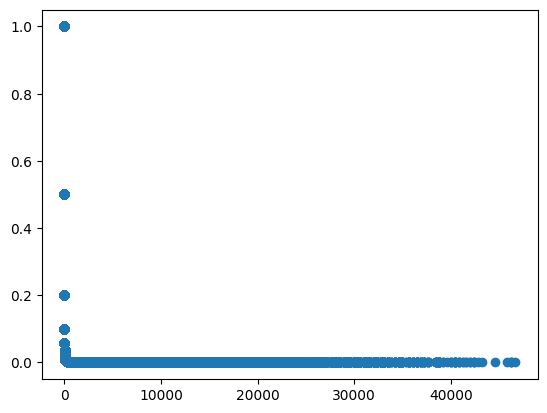

In [ ]:
X = df.iloc[:,2]
y = df.iloc[:,1]
plt.scatter(X,y);

In [ ]:
# # import module
# from sklearn.preprocessing import StandardScaler

# # compute required values
# scaler = StandardScaler()
# model = scaler.fit(df)
# scaled_data = model.transform(df)

# # print scaled data
# print(scaled_data)


In [ ]:
# from sklearn.decomposition import PCA
# pca_2 = PCA(n_components=3)
# pca_2_result = pca_2.fit_transform(scaled_data)
# print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

# # >> Explained variation per principal component: [0.36198848 0.1920749 ]

# print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))


In [ ]:
scaled_data = df

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,max_iter=1000)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=4)

In [ ]:
cl = kmeans.predict(scaled_data)
cl.shape

(219925,)

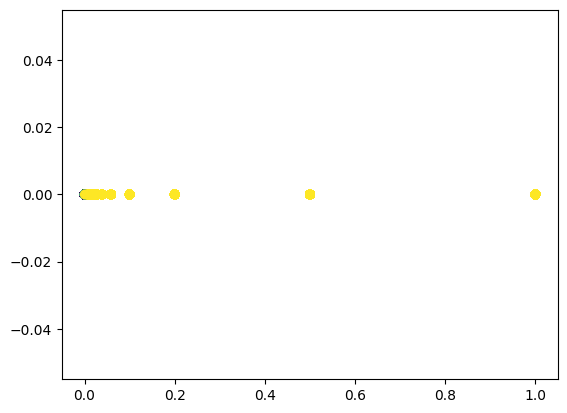

In [ ]:
X = df.iloc[:,1]
y = df.iloc[:,-1]
plt.scatter(X,y,c=cl);

In [ ]:
kmeans.inertia_

413847099803.4667

In [ ]:
# from sklearn.model_selection import ParameterGrid
# import sklearn.metrics as metrics

# # candidate values for our number of cluster
# parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
# # instantiating ParameterGrid, pass number of clusters as input
# parameter_grid = ParameterGrid({'n_clusters': parameters})
# best_score = -1
# kmeans_model = KMeans()     # instantiating KMeans model
# silhouette_scores = []
# # evaluation based on silhouette_score
# for p in parameter_grid:
#     kmeans_model.set_params(**p)    # set current hyper parameter
#     kmeans_model.fit(df)          # fit model on wine dataset, this will find clusters based on parameter p
#     ss = metrics.silhouette_score(df, kmeans_model.labels_)   # calculate silhouette_score
#     silhouette_scores += [ss]       # store all the scores
#     print('Parameter:', p, 'Score', ss)
#     # check p which has the best score
#     if ss > best_score:
#         best_score = ss
#         best_grid = p
# # plotting silhouette score
# plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
# plt.xticks(range(len(silhouette_scores)), list(parameters))
# plt.title('Silhouette Score', fontweight='bold')
# plt.xlabel('Number of Clusters')
# plt.show()


In [ ]:
# fitting KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

final_cl = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# # def min_arr(arr):
# #   min = 255
# #   for i in arr:
# #    if min>i:
# #     min = i
# #   return min

def max_arr(arr):
    max = 0
    for i in range(0,arr.size):
      if max<arr[i]:
       max = arr[i]
    return max

In [ ]:
# # max_v = max_arr(cl)# cl = scale_to_0_255(cl
# # final_cl = final_cl*255
max_v = max_arr(final_cl)
final_cl = final_cl*(255/max_v)

In [ ]:
final_cl.shape

(219925,)

In [ ]:
final_cl = final_cl.reshape(ent.shape[0],ent.shape[1])
final_cl.shape

(475, 463)

In [ ]:
final_cl

array([[255., 255.,   0., ..., 255., 255., 255.],
       [255.,   0.,   0., ..., 255., 255., 255.],
       [255.,   0.,   0., ..., 255., 255., 255.],
       ...,
       [  0.,   0.,   0., ..., 255.,   0.,   0.],
       [  0.,   0.,   0., ..., 255.,   0.,   0.],
       [  0.,   0.,   0., ..., 255.,   0.,   0.]])

In [ ]:
# import numpy as np

# def scale_to_0_255(arr):
#     min_value = min_arr(arr)
#     max_value = max_arr(arr)

#     scaled_arr = []

#     for value in arr:
#         scaled_value = ((value - min_value) / (max_value - min_value)) * 255
#         scaled_arr.append(scaled_value)

#     return scaled_arr


In [ ]:
final_cl

array([[255., 255.,   0., ..., 255., 255., 255.],
       [255.,   0.,   0., ..., 255., 255., 255.],
       [255.,   0.,   0., ..., 255., 255., 255.],
       ...,
       [  0.,   0.,   0., ..., 255.,   0.,   0.],
       [  0.,   0.,   0., ..., 255.,   0.,   0.],
       [  0.,   0.,   0., ..., 255.,   0.,   0.]])

In [ ]:
count = 0
for i in final_cl:
  for j in i:
    count+=j

count = count/255
count

61625.666666666664

In [ ]:
df_new = pd.DataFrame(final_cl)
df_new.to_csv('sample_data.csv', index=True)


In [ ]:
# image = cv2.cvtColor(cl)  # Convert grayscale to BGR (color) image

# # Save the image to a file (optional)
# cv2.imwrite('output.png', image)

grayscale_image = cv2.merge((final_cl,final_cl,final_cl))


# Save the grayscale image to a file (optional)
cv2.imwrite('output.png', grayscale_image)


True